### TP 3: Visión por Computadora

Alumnos: Fabricio Lopretto (a1616), Santiago José Olaciregui (a1611)

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [5]:
# Instala las librerias necesarias
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Importa las librerias necesarias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [7]:
# Ruta de la notebook
ruta_notebook = os.getcwd()

# Ruta al template
template_path = ruta_notebook + '/template/pattern_0.png'

# Ruta a la carperta de la imagen
images_path = ruta_notebook + '/images/coca_multi.png'

# Ruta a la carperta de imagen preprocesada
images_canny_path = ruta_notebook + '/images_canny/canny_coca_multi.png'

# Ruta a la carpeta de imagen con detecciones por plantilla
images_detect_path = ruta_notebook + '/images_detections/multi_match/detect_coca_multi'

Se realiza una primera función que realice todas las detecciones posibles.

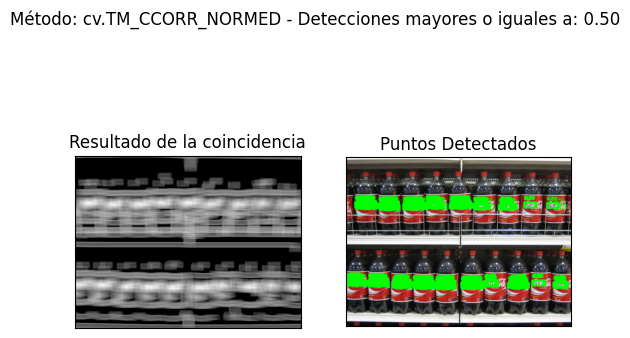

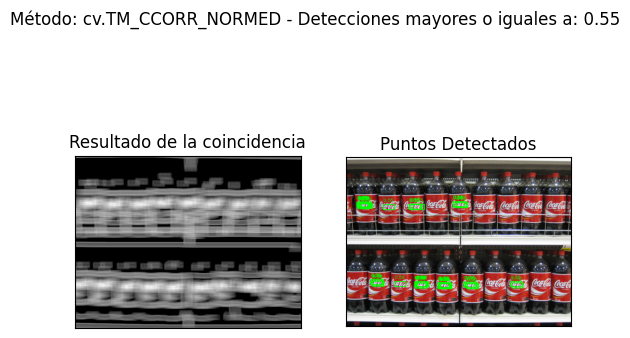

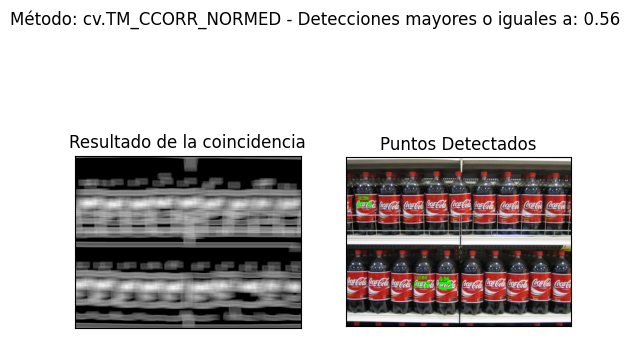

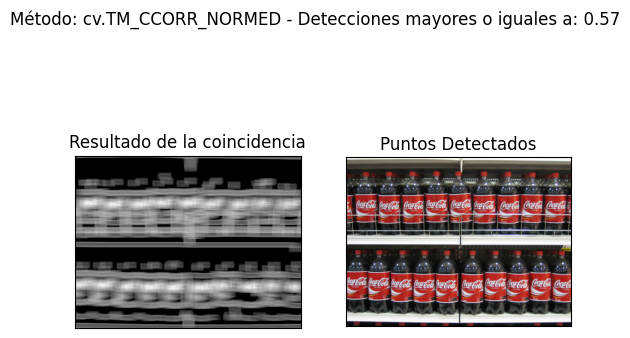

In [10]:
# Define la funcion de deteccion
def deteccion_multi(meth, ruta_imagen_original, ruta_imagen_canny, ruta_template, ruta_guarda, umbral):
    """
    Identifica múltiples instancias del logo en la imagen utilizando Template Matching.
    El umbral controla cuán estricta es la coincidencia.
    """

    # Diccionario de metodos de coincidencia de plantillas
    methods = {
        'cv.TM_CCOEFF': cv.TM_CCOEFF,
        'cv.TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
        'cv.TM_CCORR': cv.TM_CCORR,
        'cv.TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
        'cv.TM_SQDIFF': cv.TM_SQDIFF,
        'cv.TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
    }

    # Lee el template
    template = cv.imread(ruta_template,0)

    # Toma las dimensiones del template
    w, h = template.shape[::-1]

    # Lee la imagen original
    imagen_original = cv.imread(ruta_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen para la salida
    img_salida = img_ori.copy()

    # Lee la imagen binaria con escala de grises
    imagen_canny = cv.imread(ruta_imagen_canny)
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)

    # Aplica la coincidencia de patrones con la imagen de bordes
    res = cv.matchTemplate(img_gray, template, methods[meth])

    # Identificacion de metodo
    if methods[meth] in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        match_locations = np.where(res <= umbral)
    else:
        match_locations = np.where(res >= umbral)

    # Dibuja un rectangulo y añade el valor de la metrica en verde para cada coincidencia
    for pt in zip(*match_locations[::-1]):  # Invierte las coordenadas
        bottom_right = (pt[0] + w, pt[1] + h)
        cv.rectangle(img_salida, pt, bottom_right, (0, 255, 0), 2)

        # Extrae el valor de la métrica en las coordenadas de coincidencia
        valor_metric = res[pt[1], pt[0]]

        # Escribe el valor de la metrica en la esquina superior izquierda del rectangulo
        texto = f'{valor_metric:.2f}'
        cv.putText(img_salida, texto, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv.LINE_AA)

    # Grafica el resultado del matching y la imagen de salida
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Resultado de la coincidencia'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_salida)
    plt.title('Puntos Detectados'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Método: {meth} - Detecciones mayores o iguales a: {umbral:.2f}')
    plt.savefig(ruta_guarda + f'{umbral}.png', bbox_inches='tight', pad_inches=0)
    plt.show()

# Se aplica para la imagen con un umbral de métrica de 0.50
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.50)
# Se aplica para la imagen con un umbral de métrica de 0.55
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.55)
# Se aplica para la imagen con un umbral de métrica de 0.56
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.56)
# Se aplica para la imagen con un umbral de métrica de 0.57
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.57)

A la función anterior, se le agregan umbrales de rango en la posición de deteccion para no repetir varios rectángulos para una misma detección

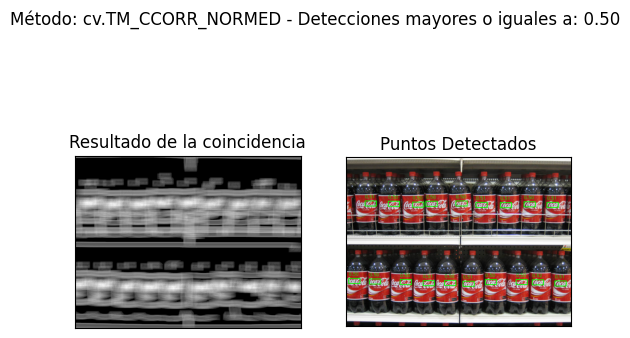

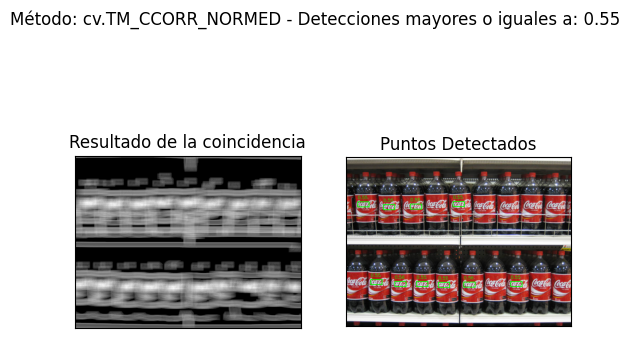

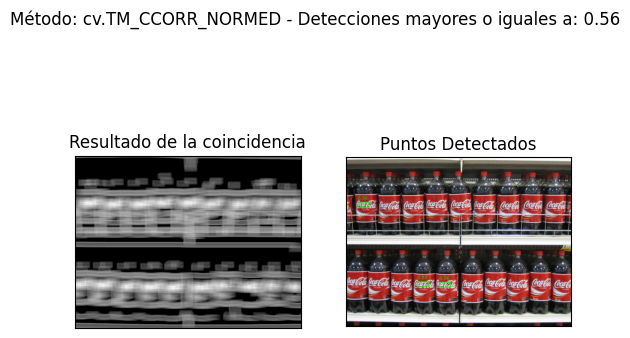

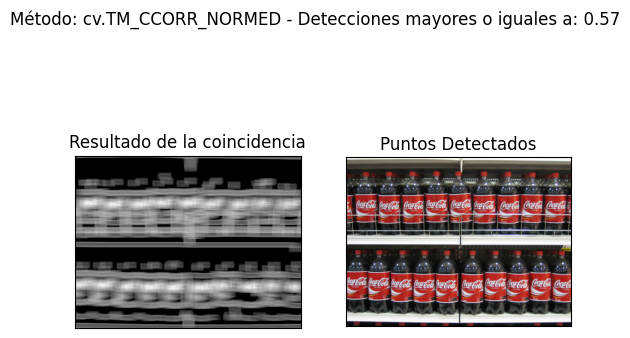

In [9]:
# Define la funcion de deteccion
def deteccion_multi(meth, ruta_imagen_original, ruta_imagen_canny, ruta_template, ruta_guarda, umbral):
    """
    Identifica múltiples instancias del logo en la imagen utilizando Template Matching.
    El umbral controla cuán estricta es la coincidencia.
    """

    # Diccionario de metodos de coincidencia de plantillas
    methods = {
        'cv.TM_CCOEFF': cv.TM_CCOEFF,
        'cv.TM_CCOEFF_NORMED': cv.TM_CCOEFF_NORMED,
        'cv.TM_CCORR': cv.TM_CCORR,
        'cv.TM_CCORR_NORMED': cv.TM_CCORR_NORMED,
        'cv.TM_SQDIFF': cv.TM_SQDIFF,
        'cv.TM_SQDIFF_NORMED': cv.TM_SQDIFF_NORMED
    }

    # Lee el template
    template = cv.imread(ruta_template,0)

    # Toma las dimensiones del template
    w, h = template.shape[::-1]

    # Lee la imagen original
    imagen_original = cv.imread(ruta_imagen_original)
    img_ori = cv.cvtColor(imagen_original, cv.COLOR_BGR2RGB)

    # Realiza una copia de la imagen para la salida
    img_salida = img_ori.copy()

    # Lee la imagen binaria con escala de grises
    imagen_canny = cv.imread(ruta_imagen_canny)
    img_gray = cv.cvtColor(imagen_canny, cv.COLOR_BGR2GRAY)

    # Aplica la coincidencia de patrones con la imagen de bordes
    res = cv.matchTemplate(img_gray, template, methods[meth])

    # Identificacion de metodo
    if methods[meth] in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        match_locations = np.where(res <= umbral)
    else:
        match_locations = np.where(res >= umbral)

    # Lista para almacenar posiciones de rectángulos ya dibujados
    rect_positions = []

    # Dibuja un rectángulo y añade el valor de la métrica en verde para cada coincidencia
    for pt in zip(*match_locations[::-1]):  # Invierte las coordenadas
        # Si es el primer rectángulo, se dibuja sin restricciones
        if not rect_positions:
            draw_rectangle(pt, img_salida, w, h, res)
            rect_positions.append(pt)  # Guarda la posición del primer rectángulo
        else:
            # Verifica si la nueva posición está lo suficientemente lejos de las anteriores
            if all(np.linalg.norm(np.array(pt) - np.array(pos)) >= max(w, h) for pos in rect_positions):
                draw_rectangle(pt, img_salida, w, h, res)
                rect_positions.append(pt)  # Guarda la posición del nuevo rectángulo

    # Grafica el resultado del matching y la imagen de salida
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Resultado de la coincidencia'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_salida)
    plt.title('Puntos Detectados'), plt.xticks([]), plt.yticks([])
    plt.suptitle(f'Método: {meth} - Detecciones mayores o iguales a: {umbral:.2f}')
    plt.savefig(ruta_guarda + f'{umbral}.png', bbox_inches='tight', pad_inches=0)
    plt.show()


def draw_rectangle(pt, img, w, h, res):
    """
    Dibuja un rectángulo en la imagen y escribe la métrica en verde
    en la esquina superior izquierda del rectángulo.
    """
    bottom_right = (pt[0] + w, pt[1] + h)
    cv.rectangle(img, pt, bottom_right, (0, 255, 0), 2)

    # Extrae el valor de la métrica en las coordenadas de coincidencia
    valor_metric = res[pt[1], pt[0]]

    # Escribe el valor de la métrica en la esquina superior izquierda del rectángulo
    texto = f'{valor_metric:.2f}'
    cv.putText(img, texto, (pt[0], pt[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv.LINE_AA)


# Se aplica para la imagen con un umbral de métrica de 0.50
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.50)
# Se aplica para la imagen con un umbral de métrica de 0.55
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.55)
# Se aplica para la imagen con un umbral de métrica de 0.56
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.56)
# Se aplica para la imagen con un umbral de métrica de 0.57
deteccion_multi('cv.TM_CCORR_NORMED', images_path, images_canny_path, template_path, images_detect_path, 0.57)

Observaciones:

En este caso se utilizó nuevamente la imagen binaria constriuda a partir de un filtro de canny para resaltar bordes, el coeficiente de correlación normalizado como métrica y un tamaño particular del template para la comparación.

En la primera función, se realizó la detección para diferentes valores de umbral de la métrica para evitar la saturación de falsos positivos aunque ello conlleve que no se den todas las detecciones posibles. En este caso particular, se observó que para valores de métrica por encima de 0.50 se detectan todos los casos pero en varios puntos para un mismo logo, mientras que con umbrales de 0.55 o 0.56 se consigue una detección más limpia si bien no logrando todas las posibles.

En la segunda función, se agregó una condición para no plotear rectángulos (detecciones) si ya se encuentra uno previamente ploteado en una ubicación cercana. Esto se agregó para evitar saturar de detecciones un mismo logo de la marca.